In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')

In [2]:
from problog.program import PrologString
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.prolog_engine.engine_prolog import EngineProlog
from problog.formula import LogicFormula, LogicDAG
from graphviz import Source
from problog.cycles import break_cycles
from problog.sdd_formula import SDD
from time import time

from problog.prolog_engine.swi_program import SWIProgram

In [3]:
file='''
0.25::stress(1).
0.35::stress(2).

0.2::influences(1,2).
0.2::influences(2,1).

smokes(X) :- stress(X).
smokes(X) :- influences(Y, X), smokes(Y).

query(smokes(1)).
query(smokes(2)).'''
program = PrologString(file)


# Exact

In [4]:
engine = DefaultEngine()
db = engine.prepare(program)

In [5]:
ground = engine.ground_all(db, target=LogicFormula())
ac = SDD.create_from(ground)
p1 = ac.evaluate()
print(p1)

{smokes(1): 0.30250000000000005, smokes(2): 0.38249999999999995}


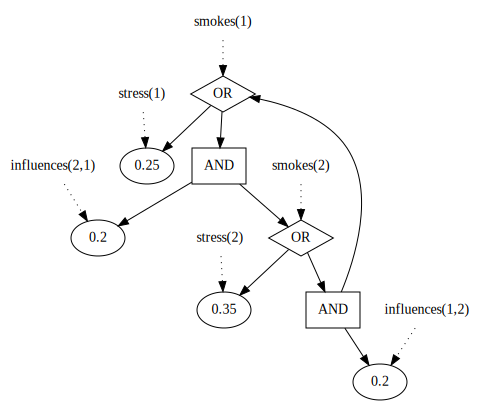

In [6]:
Source(ground.to_dot())

# New engine

In [7]:
engine = EngineProlog()
db = engine.prepare(program)
translated = SWIProgram(db)
print(translated)

rule(smokes(A1),[stress(A1)]).
rule(smokes(A1),[influences(A2,A1),smokes(A2)]).
fact(0.25,stress(1),1).
fact(0.35,stress(2),2).
fact(0.2,influences(1,2),3).
fact(0.2,influences(2,1),4).
fact(1.0,query(smokes(1)),5).
fact(1.0,query(smokes(2)),6).


In [8]:
for p in translated.get_proofs('smokes(1)',None):
    print(p)

(smokes(1), and(smokes(1),[fact(0.2,influences(2,1),4), and(smokes(2),[fact(0.2,influences(1,2),3), cycle(smokes(1))])]))
(smokes(1), and(smokes(1),[fact(0.2,influences(2,1),4), and(smokes(2),[fact(0.35,stress(2),2)])]))
(smokes(1), and(smokes(1),[fact(0.25,stress(1),1)]))


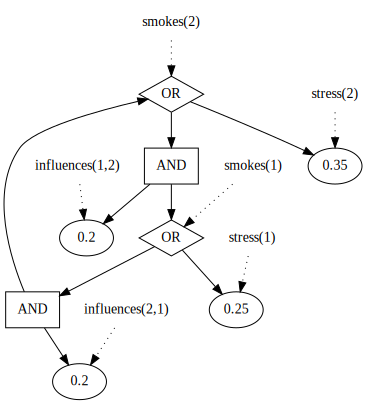

In [9]:
ground = engine.ground_all(db, target=LogicFormula())
Source(ground.to_dot())

In [10]:
ac = SDD.create_from(ground)
p2 = ac.evaluate()
print(p2)

{smokes(2): 0.3824999999999999, smokes(1): 0.30250000000000005}


In [11]:
p1==p2

False